In [24]:
# Importing libraries
import pandas as pd
import re

# Download file
file_path = 'high-school-directory.csv'

# Read CSV
df = pd.read_csv(file_path)

# View first lines
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [25]:
# Cleaning column names:
# - lower case
# - spaces -> _
# - removal of special characters
df.columns = [
    re.sub(r'[^a-z0-9_]', '', col.lower().replace(' ', '_'))
    for col in df.columns
]

# Checking the result
df.columns[:10]

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max'],
      dtype='object')

In [27]:
# Filter schools located in Brooklyn
brooklyn_schools = df[df['borough'] == 'Brooklyn']

# View the first rows
brooklyn_schools.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


In [28]:
# Number of unique schools (by dbn) in Brooklyn
brooklyn_schools['dbn'].nunique()

121

In [29]:
# Schools in Brooklyn where the first grade is 9
brooklyn_schools[brooklyn_schools['grade_span_min'] == 9]['dbn'].nunique()

98

In [30]:
# Grouping and counting unique schools by district
df.groupby('borough')['dbn'].nunique()

,dbn
borough,
Bronx,118
Brooklyn,121
Manhattan,106
Queens,80
Staten Island,10


In [31]:
# Average number of students per district
df.groupby('borough')['total_students'].mean().round(0)

,total_students
borough,
Bronx,490.0
Brooklyn,699.0
Manhattan,590.0
Queens,1047.0
Staten Island,1848.0


In [32]:
# Summary statistics for grade_span_max by district
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


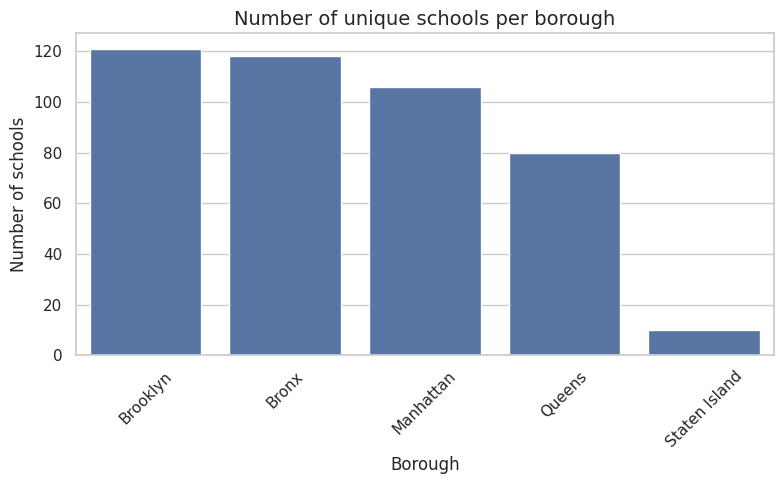

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
sns.set(style="whitegrid")

# Data preparation
borough_counts = df.groupby('borough')['dbn'].nunique().sort_values(ascending=False)

# Building a graph
plt.figure(figsize=(8, 5))
sns.barplot(x=borough_counts.index, y=borough_counts.values)

plt.title('Number of unique schools per borough', fontsize=14)
plt.xlabel('Borough')
plt.ylabel('Number of schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## NYC High School Directory Results

### 1. Brooklyn — Leader in Number of Schools
- Brooklyn has **121 unique schools**, making it the most densely populated district in terms of educational institutions.
- Of these, 98 schools offer admission starting in 9th grade.

---

### 2. School sizes vary greatly between districts
- Average number of students:
  - **Staten Island** — 1,848 students per school on average
  - **Queens** — 1,047
  - **Brooklyn** — 699
  - **Manhattan** — 590
  - **Bronx** — 490

---

### 3. Almost all schools end in 12th grade
- In most schools, `grade_span_max` = 12
- Only rare cases show graduation in 9th–11th grade